In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
file_path = "/content/drive/MyDrive/Colab Notebooks/Heart_Disease_Prediction.csv"


In [3]:
import pandas as pd

df = pd.read_csv(file_path)
df.head()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.shape


(270, 14)

In [5]:
df.columns


Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
df["Heart Disease"].value_counts()


,count
Heart Disease,
Absence,150
Presence,120


In [8]:
df["Heart Disease"] = df["Heart Disease"].map({
    "Absence": 0,
    "Presence": 1
})


In [9]:
df["Heart Disease"].value_counts()
df["Heart Disease"].dtype


dtype('int64')

In [10]:
df = pd.get_dummies(
    df,
    columns=["Chest pain type", "EKG results", "Thallium"],
    drop_first=True
)


In [11]:
df.head()
df.shape


(270, 18)

In [12]:
X = df.drop(columns=["Heart Disease"])
y = df["Heart Disease"]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,      # 20%는 테스트
    random_state=42,
    stratify=y          # 질환 비율 유지 (중요!)
)


In [14]:
X_train.shape
X_test.shape


(54, 17)

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

pred = model.predict(X_test)

print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))


[[26  4]
 [ 2 22]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90        30
           1       0.85      0.92      0.88        24

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



In [17]:
corr = df.corr()


In [20]:
hd_corr = corr["Heart Disease"].sort_values()
hd_corr


,Heart Disease
Max HR,-0.418514
Chest pain type_3,-0.296717
Chest pain type_2,-0.239929
FBS over 120,-0.016319
EKG results_1,0.009658
Thallium_6,0.059761
Cholesterol,0.118021
BP,0.155383
EKG results_2,0.180562
Age,0.212322


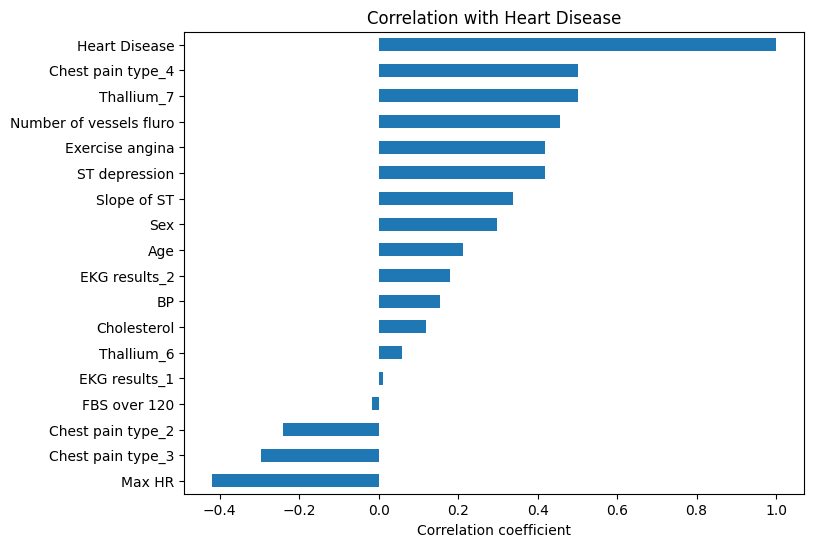

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
hd_corr.plot(kind="barh")
plt.title("Correlation with Heart Disease")
plt.xlabel("Correlation coefficient")
plt.show()
